In [1]:
# %conda install -c conda-forge seaborn -y

# Análise de datos con PANDAS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Apertura do CSV

In [3]:
df = pd.read_csv("archives/datos_covid2021_3paises.csv", usecols=["dia","pais","contaxios","mortes"])
# df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,dia,pais,contaxios,mortes
0,2021-01-01,Spain,18047,148
1,2021-01-02,Spain,0,0
2,2021-01-03,Spain,0,0
3,2021-01-04,Spain,30579,241
4,2021-01-05,Spain,23700,352
...,...,...,...,...
1090,2021-12-27,France,29614,245
1091,2021-12-28,France,179316,294
1092,2021-12-29,France,202293,173
1093,2021-12-30,France,206243,180



### Limpia valores nulos e/ou inválidos/vacíos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dia        1095 non-null   object
 1   pais       1095 non-null   object
 2   contaxios  1095 non-null   int64 
 3   mortes     1095 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 34.3+ KB


In [5]:
df.isna().sum()
# No hay ningún valor nulo
# df.dropna(inplace=True)

dia          0
pais         0
contaxios    0
mortes       0
dtype: int64

### 1. Calcula a media de novos casos ao día

In [6]:
df["contaxios"].mean()

12094.346118721462

### 2. Calcula a media de mortes ao día

In [7]:
df["mortes"].mean()

98.00182648401827

### 3. Calcula o número máximo de casos

In [8]:
df["contaxios"].max()

232200

### 4. Calcula o número medio de casos separado por grupos

In [9]:
df.groupby(by="pais")[["contaxios"]].mean()

,contaxios
pais,
France,20638.731507
Portugal,2666.789041
Spain,12977.517808


### 5. Existe unha correlación entre número de novos casos e mortes?

In [11]:
df[["contaxios", "mortes"]].corr()

,contaxios,mortes
contaxios,1.000000,0.385233
mortes,0.385233,1.000000


<Axes: >

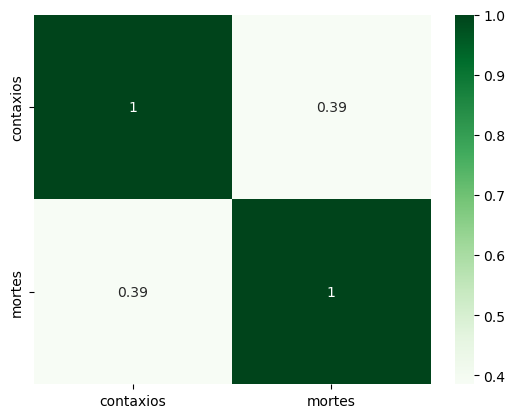

In [22]:
sns.heatmap(np.abs(df[["contaxios", "mortes"]].corr()), annot=True, cmap='Greens')

### 6. No caso de que exista unha relación, en que país é maior?

In [13]:
df.groupby("pais")[["contaxios", "mortes"]].corr()

contaxios    mortes
pais                                   
France   contaxios   1.000000  0.298286
         mortes      0.298286  1.000000
Portugal contaxios   1.000000  0.563438
         mortes      0.563438  1.000000
Spain    contaxios   1.000000  0.323957
         mortes      0.323957  1.000000

<Axes: ylabel='pais-None'>

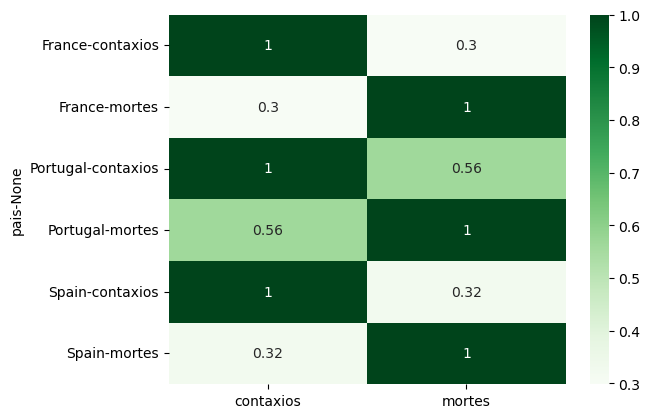

In [14]:
sns.heatmap(np.abs(df.groupby("pais")[["contaxios", "mortes"]].corr()), annot=True, cmap='Greens')

- Como se puede observar, Portugal es el país en el que más correlación tiene

### 7. Cal é a mediana de casos confirmados en Portugal?

In [15]:
df[df["pais"] == "Portugal"]["contaxios"].median()

1186.0

### 8. Cales son os valores dos percentís Q1 e Q3 de Francia para o número de contaxios

In [16]:
q1 = df[df["pais"] == "France"]["contaxios"].quantile(0.25)
q3 = df[df["pais"] == "France"]["contaxios"].quantile(0.75)

print(f"Q1-{q1}\tQ3-{q3}")

Q1-4256.0	Q3-25087.0


### 9. Cantos valores diferentes hai para o número de contaxios nun día en cada un dos países

In [26]:
df.groupby("pais")["contaxios"].nunique()

pais
France      332
Portugal    345
Spain       250
Name: contaxios, dtype: int64

### 10. Valor mínimo e máximo de contaxios por día para cada país

In [32]:
print("Valor mínimo e máximo de contaxios por día para cada país")
df.groupby(["pais", "dia"])["contaxios"].agg(["min","max"])

Valor mínimo e máximo de contaxios por día para cada país


min     max
pais   dia                       
France 2021-01-01   19143   19143
       2021-01-02    3359    3359
       2021-01-03   12489   12489
       2021-01-04    4022    4022
       2021-01-05   20280   20280
...                   ...     ...
Spain  2021-12-27  214619  214619
       2021-12-28   99671   99671
       2021-12-29  100760  100760
       2021-12-30  161688  161688
       2021-12-31  161688  161688

[1095 rows x 2 columns]